In [28]:
import pandas as pd
import numpy as np 
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import datetime
import pandas_datareader.data as web
from pandas import Series, DataFrame
from scipy.stats import linregress
import seaborn as seaborninstance

In [27]:
# Import Stock data
start = datetime.datetime(2015, 1, 1)
end = datetime.datetime(2020, 8, 20)
df_total = web.DataReader('TSLA', "yahoo", start, end)
df_total.tail()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2020-08-14,1668.800049,1626.640015,1664.989990,1650.709961,12577600,1650.709961
2020-08-17,1845.859985,1672.829956,1677.000000,1835.640015,20242300,1835.640015
2020-08-18,1923.900024,1845.109985,1898.989990,1887.089966,16474500,1887.089966
2020-08-19,1911.000000,1841.209961,1865.000000,1878.530029,12205300,1878.530029
2020-08-20,2021.989990,1857.060059,1860.680054,2001.829956,20611800,2001.829956


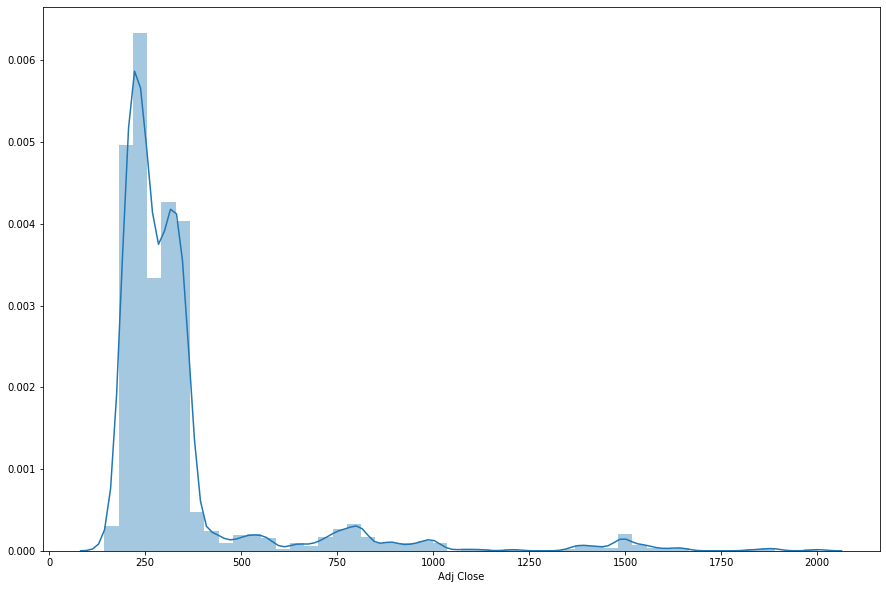

In [29]:
# Determine Average Adj close Price of the stock
plt.figure(figsize=(15,10))
plt.tight_layout()
seaborninstance.distplot(df_total['Adj Close'])

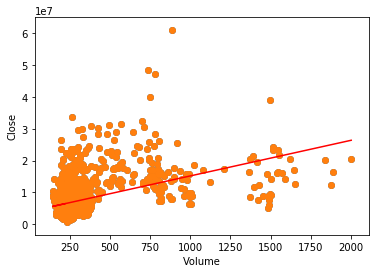

The r-squared is: 0.21477092859273042


In [30]:
# Analyze Correlation between Volume and Closing Price
x_values = df_total['Close']
y_values = df_total['Volume']
plt.scatter(x_values,y_values)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Volume')
plt.ylabel('Close')
plt.show()
print(f"The r-squared is: {rvalue**2}")

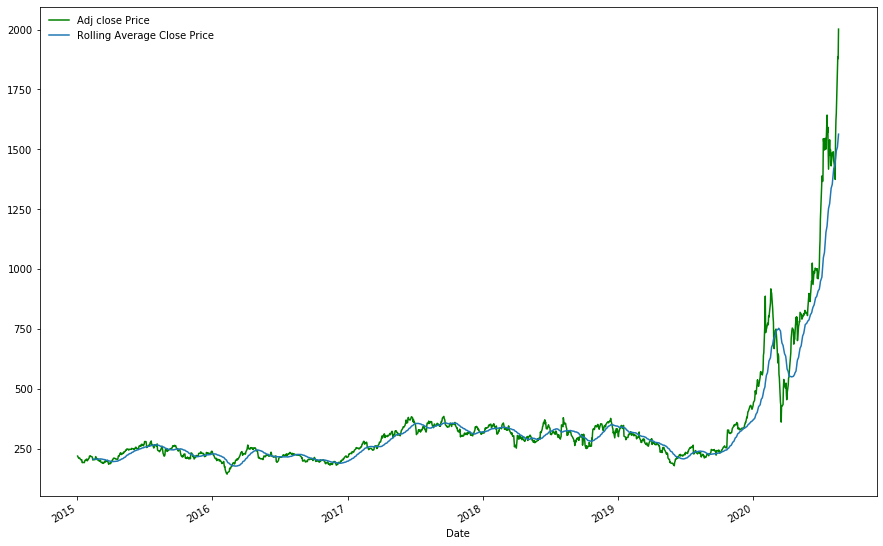

In [31]:
# Analyze the Adj Close Price over time and rolling average close price
%matplotlib inline
plt.figure(figsize=[15,10])
plt.grid(True)
plt.plot(df_total['Adj Close'],label = 'Adj close Price',color='green')
#plt.plot(df_total['High'],label = 'High Price',color='blue')
#plt.plot(df_total['Close'],label = 'Close Price',color ='orange')
df_total['Adj Close'].rolling(window=30).mean().plot(label = 'Rolling Average Close Price')
plt.legend(loc='upper left', frameon=False)

In [32]:
# Obtain Adjusted Close Price 
df = df_total[['Adj Close']] 
print(df.head(10))

             Adj Close
Date                  
2015-01-02  219.309998
2015-01-05  210.089996
2015-01-06  211.279999
2015-01-07  210.949997
2015-01-08  210.619995
2015-01-09  206.660004
2015-01-12  202.210007
2015-01-13  204.250000
2015-01-14  192.690002
2015-01-15  191.869995


In [33]:

#Create another column (the target ) shifted 1 unit down
df['prev_close'] = df[['Adj Close']].shift(1)
df.tail()

C:\Users\Devulapalli\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Adj Close,prev_close
Date,,
2020-08-14,1650.709961,1621.000000
2020-08-17,1835.640015,1650.709961
2020-08-18,1887.089966,1835.640015
2020-08-19,1878.530029,1887.089966
2020-08-20,2001.829956,1878.530029


In [34]:
df['price_change'] = df['Adj Close'] - df['prev_close']
df

C:\Users\Devulapalli\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,Adj Close,prev_close,price_change
Date,,,
2015-01-02,219.309998,NaN,NaN
2015-01-05,210.089996,219.309998,-9.220001
2015-01-06,211.279999,210.089996,1.190002
2015-01-07,210.949997,211.279999,-0.330002
2015-01-08,210.619995,210.949997,-0.330002
...,...,...,...
2020-08-14,1650.709961,1621.000000,29.709961
2020-08-17,1835.640015,1650.709961,184.930054
2020-08-18,1887.089966,1835.640015,51.449951


In [35]:
#df['rolling_average'] = df['price_change'].rolling(1).mean()
df['price_change_rolling_average'] = df.iloc[:,2].rolling(window=30).mean()
df

C:\Users\Devulapalli\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Adj Close,prev_close,price_change,price_change_rolling_average
Date,,,,
2015-01-02,219.309998,NaN,NaN,NaN
2015-01-05,210.089996,219.309998,-9.220001,NaN
2015-01-06,211.279999,210.089996,1.190002,NaN
2015-01-07,210.949997,211.279999,-0.330002,NaN
2015-01-08,210.619995,210.949997,-0.330002,NaN
...,...,...,...,...
2020-08-14,1650.709961,1621.000000,29.709961,14.734998
2020-08-17,1835.640015,1650.709961,184.930054,15.468669
2020-08-18,1887.089966,1835.640015,51.449951,16.574333


In [36]:
df['price_change_average'] = df.iloc[:,2].mean()
df.tail()

C:\Users\Devulapalli\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,Adj Close,prev_close,price_change,price_change_rolling_average,price_change_average
Date,,,,,
2020-08-14,1650.709961,1621.000000,29.709961,14.734998,1.257066
2020-08-17,1835.640015,1650.709961,184.930054,15.468669,1.257066
2020-08-18,1887.089966,1835.640015,51.449951,16.574333,1.257066
2020-08-19,1878.530029,1887.089966,-8.559937,17.088334,1.257066
2020-08-20,2001.829956,1878.530029,123.299927,20.251664,1.257066


In [37]:
### Create the independent data set (X)  #######
# Convert the dataframe to a numpy array
X = df[["prev_close", "price_change_rolling_average",'price_change_average']]
y = df['Adj Close']
#Remove the forecasted number of rows
X = X[30:]
y = y[30:]
print(y)
print(X)

Date
2015-02-17     204.350006
2015-02-18     204.460007
2015-02-19     211.710007
2015-02-20     217.110001
2015-02-23     207.339996
                 ...     
2020-08-14    1650.709961
2020-08-17    1835.640015
2020-08-18    1887.089966
2020-08-19    1878.530029
2020-08-20    2001.829956
Name: Adj Close, Length: 1389, dtype: float64
             prev_close  price_change_rolling_average  price_change_average
Date                                                                       
2015-02-17   203.770004                     -0.498666              1.257066
2015-02-18   204.350006                     -0.187666              1.257066
2015-02-19   204.460007                      0.014334              1.257066
2015-02-20   211.710007                      0.205333              1.257066
2015-02-23   217.110001                     -0.109333              1.257066
...                 ...                           ...                   ...
2020-08-14  1621.000000                     14.734998  

In [38]:
# Split the data into 80% training and 20% testing
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [39]:
# Create and train the Linear Regression  Model
lr = LinearRegression()
# Train the model
lr.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [40]:
# Testing Model: Score returns the coefficient of determination R^2 of the prediction. 
lr_confidence = lr.score(x_test, y_test)
print("lr confidence: ", lr_confidence)

lr confidence:  0.9926755583101924


In [44]:
lr_prediction = lr.predict([[2001.82,15.46,1.14]])
print(lr_prediction)
lr.coef_

[2012.36031914]


array([9.93867843e-01, 1.32702346e+00, 4.44751456e-33])

In [45]:
svr_rbf = SVR(kernel='linear', C=1e3, gamma=0.1) 
svr_rbf.fit(x_train, y_train)

SVR(C=1000.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma=0.1,
    kernel='linear', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [46]:
# Testing Model: Score returns the coefficient of determination R^2 of the prediction. 
svm_value = svr_rbf.score(x_test, y_test)
print("svm_model: ", svm_value)

svm_model:  0.9577287341623825


In [47]:
svm_prediction = svr_rbf.predict([[2001.82,15.46,1.14]])
print(svm_prediction)

[2316.38684667]


In [21]:
df_total1 = df_total.reset_index(inplace = True) 

In [26]:
df_total.to_csv("Tesla.csv", index=False, header=True)

In [24]:
df_total

,Date,High,Low,Open,Close,Volume,Adj Close
0,2015-01-02,223.250000,213.259995,222.869995,219.309998,4764400,219.309998
1,2015-01-05,216.500000,207.160004,214.550003,210.089996,5368500,210.089996
2,2015-01-06,214.199997,204.210007,210.059998,211.279999,6261900,211.279999
3,2015-01-07,214.779999,209.779999,213.350006,210.949997,2968400,210.949997
4,2015-01-08,213.800003,210.009995,212.809998,210.619995,3442500,210.619995
...,...,...,...,...,...,...,...
1411,2020-08-11,1420.000000,1365.000000,1396.000000,1374.390015,8625800,1374.390015
1412,2020-08-12,1585.000000,1435.000000,1470.000000,1554.760010,21898800,1554.760010
1413,2020-08-13,1651.180054,1567.260010,1611.000000,1621.000000,20425300,1621.000000
1414,2020-08-14,1668.800049,1626.640015,1664.989990,1650.709961,12577600,1650.709961
